In [1]:
import pathlib

benchmark_tree = pathlib.Path() / '..' / 'benchmark' / 'aig' / 'epfl' / 'ctrl.json'
benchmark_entropy = pathlib.Path() / '..' / 'benchmark' / 'entropy' / 'epfl' / 'ctrl.json'

In [2]:
import landauer.entropy as entropy
import landauer.parse as parse

with open(benchmark_tree) as f:
    aig = parse.deserialize(f.read())

with open(benchmark_entropy) as f:
    entropy_data = entropy.deserialize(f.read())

In [5]:
import landauer.summary as summary
import landauer.algorithms.genetic as genetic

param_map = {
    'name': 'Parametrização Básica',
    'w_energy': 1,
    'w_delay': 0,
    'n_generations': 30,
    'n_initial_individuals': 30,
    'reproduction_rate': 1,
    'mutation_rate': 0.1,
    'mutation_intensity': 0.1,
    'elitism_rate': 0.1
}

results = genetic.genetic(aig, entropy_data, param_map, )
solutions = list(map(lambda x: x.forwarding, results['solutions']))

samples = list()
for forwarding in solutions:
    details = summary.summary(forwarding, entropy_data)
    samples.append((details['entropy_losses'], details['depth']))

Energia e Delay inciais
146.3490285599354
10
0 - Melhor: 71.30158075783642 - Pior: 83.43576555363028
1 - Melhor: 71.30158075783642 - Pior: 80.54154621934231
2 - Melhor: 71.30158075783642 - Pior: 79.18533197120337
3 - Melhor: 71.30158075783642 - Pior: 78.66824262313743
4 - Melhor: 71.30158075783642 - Pior: 77.90071688906417
5 - Melhor: 71.30158075783642 - Pior: 77.41828511703962
6 - Melhor: 70.27989161638943 - Pior: 76.76579021549662
7 - Melhor: 68.63959900243619 - Pior: 76.47714565955123
8 - Melhor: 68.60615190214392 - Pior: 75.84837200203896
9 - Melhor: 68.60615190214392 - Pior: 75.61495762604147
10 - Melhor: 68.60615190214392 - Pior: 75.26811410150609
11 - Melhor: 68.60615190214392 - Pior: 73.91776193367744
12 - Melhor: 68.60615190214392 - Pior: 73.87082783178447
13 - Melhor: 68.60615190214392 - Pior: 72.85357059065784
14 - Melhor: 68.60615190214392 - Pior: 72.22877455429374
15 - Melhor: 68.60615190214392 - Pior: 70.52977817158884
16 - Melhor: 68.60615190214392 - Pior: 70.27989161638

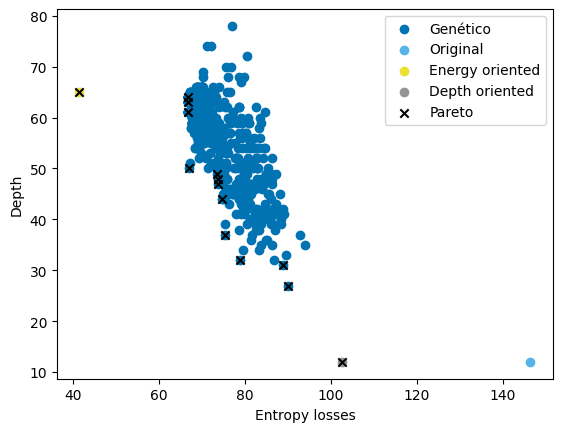

In [6]:
import landauer.plot as plot
p = plot.Plot()
p.plot_samples(samples, 'Genético')
p.plot_original(aig, entropy_data)
p.plot_naive(aig, entropy_data)
p.plot_pareto()